In [1]:
import os

import numpy as np

from keras.preprocessing.image import ImageDataGenerator

from keras.applications import EfficientNetB0, EfficientNetV2B0, EfficientNetB7

from keras.applications.efficientnet_v2 import EfficientNetV2B1, EfficientNetV2B3

from keras.layers import Dense, GlobalAveragePooling2D, Dropout

from keras.models import Model, load_model

from keras.optimizers import Adam

import matplotlib.pyplot as plt

In [2]:
# Set directory paths
data_dir = 'C:\Active-Projects\RHUL-FYP\PROJECT\skin-cancer-dataset\Resized_200x200_MIX_2Classes'

# Define constants
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
NUM_CLASSES = 2
EPOCHS = 200

In [3]:
# Data generators

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Scale the input in range (0, 1)
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.2,
    validation_split=0.2,
    rotation_range=360,
    vertical_flip=True,
    brightness_range=(0.7, 1.3),
)

val_datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Scale the input in range (0, 1)
    width_shift_range=0.1,
    height_shift_range=0.1,
    validation_split=0.2,
    rotation_range=360,
    horizontal_flip=True,
    vertical_flip=True,
)


train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=True,
    seed=42,
    subset="training",
)

val_generator = val_datagen.flow_from_directory(
    data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=True,
    seed=42,
    subset="validation",
)


Found 388 images belonging to 2 classes.
Found 96 images belonging to 2 classes.


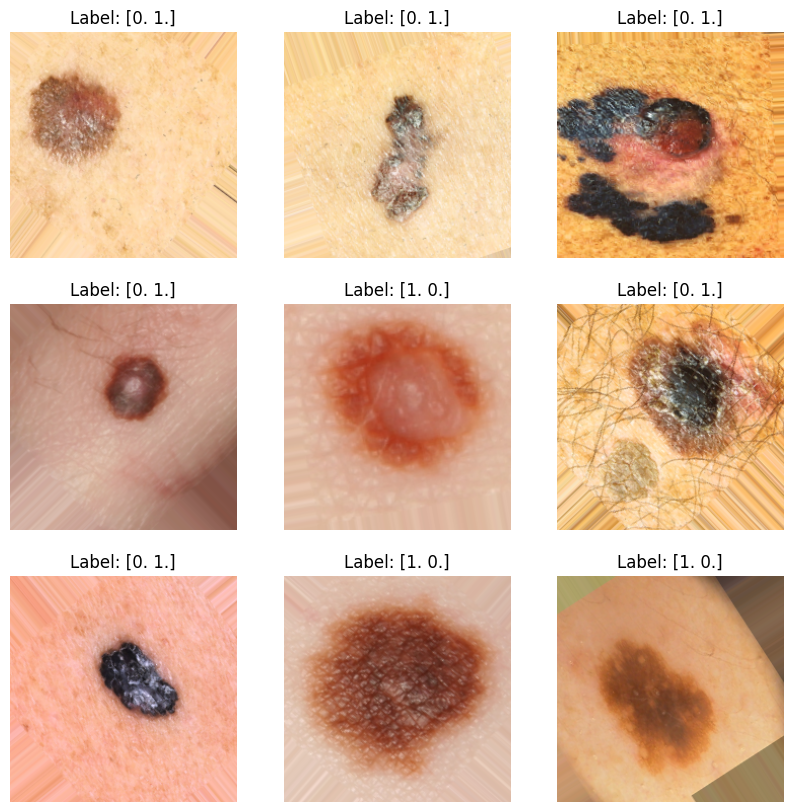

In [4]:
import matplotlib.pyplot as plt
# Display some of the images from the training set
x_batch, y_batch = next(val_generator)

# Display the first 9 images from the batch
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_batch[i])
    ax.axis('off')
    ax.set_title(f"Label: {y_batch[i]}")
plt.show()


In [19]:
# Load pre-trained VGG16 and create a new custom model

base_model = EfficientNetV2B1(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x) 
x = Dense(1024, activation='relu')(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze layers in the original VGG16 model

for layer in base_model.layers[:-35]:
	layer.trainable = False

model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_4 (Rescaling)        (None, 224, 224, 3)  0           ['input_5[0][0]']                
                                                                                                  
 normalization_4 (Normalization  (None, 224, 224, 3)  0          ['rescaling_4[0][0]']            
 )                                                                                                
                                                                                            

In [20]:
model.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_generator, epochs=EPOCHS, validation_data=val_generator)

Epoch 1/200
13/13 [==============================] - 13s 483ms/step - loss: 0.7165 - accuracy: 0.4588 - val_loss: 0.6939 - val_accuracy: 0.4375
Epoch 2/200
13/13 [==============================] - 5s 351ms/step - loss: 0.7004 - accuracy: 0.5206 - val_loss: 0.6985 - val_accuracy: 0.4375
Epoch 3/200
13/13 [==============================] - 5s 351ms/step - loss: 0.7003 - accuracy: 0.4794 - val_loss: 0.6970 - val_accuracy: 0.4375
Epoch 4/200
13/13 [==============================] - 5s 348ms/step - loss: 0.6893 - accuracy: 0.5670 - val_loss: 0.6962 - val_accuracy: 0.4375
Epoch 5/200
13/13 [==============================] - 5s 358ms/step - loss: 0.6855 - accuracy: 0.5515 - val_loss: 0.6967 - val_accuracy: 0.4375
Epoch 6/200
13/13 [==============================] - 5s 352ms/step - loss: 0.6983 - accuracy: 0.5335 - val_loss: 0.6952 - val_accuracy: 0.4375
Epoch 7/200
13/13 [==============================] - 5s 353ms/step - loss: 0.6888 - accuracy: 0.5490 - val_loss: 0.6951 - val_accuracy: 0.437

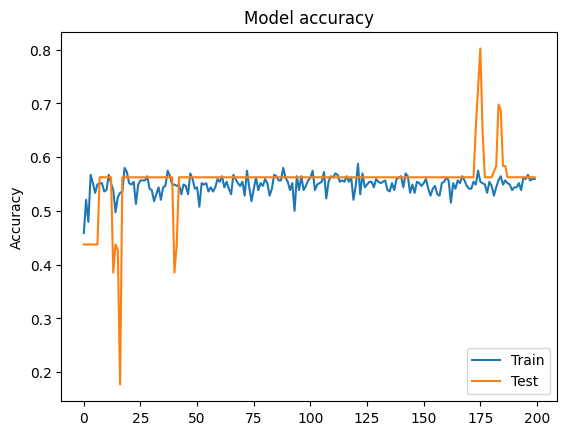

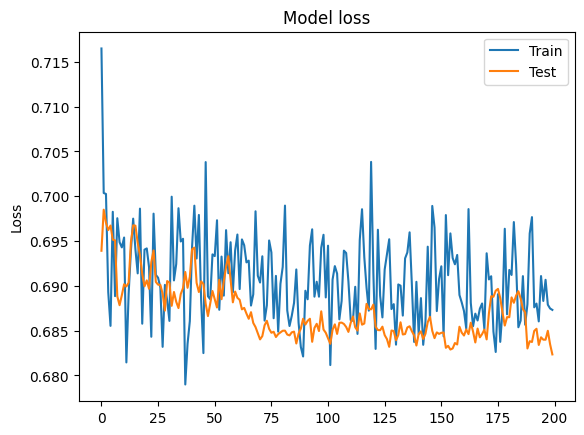

In [21]:
# Show the history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

# Plot the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()


In [22]:
for layer in model.layers:
	 layer.trainable = True

model.compile(optimizer=Adam(learning_rate=0.0000001), loss='categorical_crossentropy', metrics=['accuracy'])

fine_tune_history = model.fit(train_generator, epochs=EPOCHS, validation_data=val_generator, verbose=1)

Epoch 1/200
13/13 [==============================] - 18s 511ms/step - loss: 0.7043 - accuracy: 0.4820 - val_loss: 0.7090 - val_accuracy: 0.4375
Epoch 2/200
13/13 [==============================] - 4s 357ms/step - loss: 0.6948 - accuracy: 0.5284 - val_loss: 0.7059 - val_accuracy: 0.2812
Epoch 3/200
13/13 [==============================] - 5s 343ms/step - loss: 0.6881 - accuracy: 0.5490 - val_loss: 0.6527 - val_accuracy: 0.6979
Epoch 4/200
13/13 [==============================] - 4s 334ms/step - loss: 0.7083 - accuracy: 0.4356 - val_loss: 0.6739 - val_accuracy: 0.6250
Epoch 5/200
13/13 [==============================] - 4s 338ms/step - loss: 0.6949 - accuracy: 0.5464 - val_loss: 0.7229 - val_accuracy: 0.3958
Epoch 6/200
13/13 [==============================] - 5s 346ms/step - loss: 0.6903 - accuracy: 0.5180 - val_loss: 0.6980 - val_accuracy: 0.5417
Epoch 7/200
13/13 [==============================] - 4s 339ms/step - loss: 0.6988 - accuracy: 0.5000 - val_loss: 0.6900 - val_accuracy: 0.562

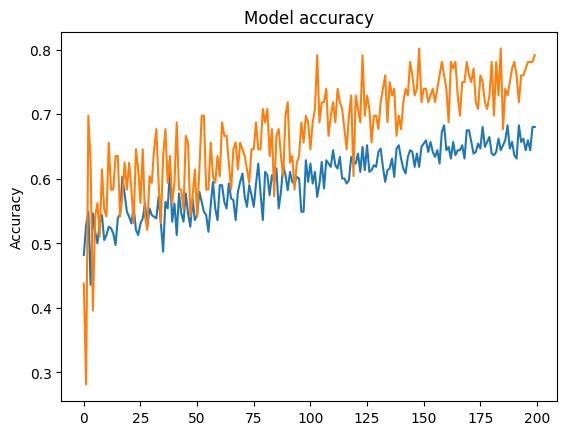

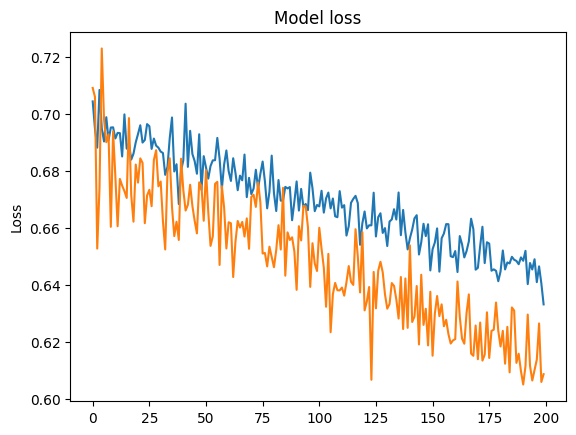

In [23]:
plt.plot(fine_tune_history.history['accuracy'])
plt.plot(fine_tune_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.show()

# Plot the loss
plt.plot(fine_tune_history.history['loss'])
plt.plot(fine_tune_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.show()


In [24]:
for layer in model.layers:
	 layer.trainable = True

model.compile(optimizer=Adam(learning_rate=0.0000001), loss='categorical_crossentropy', metrics=['accuracy'])

fine_tune_history_ext1 = model.fit(train_generator, epochs=EPOCHS, validation_data=val_generator, verbose=1)

Epoch 1/200
13/13 [==============================] - 16s 485ms/step - loss: 0.6353 - accuracy: 0.6753 - val_loss: 0.6092 - val_accuracy: 0.7500
Epoch 2/200
13/13 [==============================] - 4s 327ms/step - loss: 0.6420 - accuracy: 0.6856 - val_loss: 0.6104 - val_accuracy: 0.7604
Epoch 3/200
13/13 [==============================] - 5s 340ms/step - loss: 0.6417 - accuracy: 0.6675 - val_loss: 0.6269 - val_accuracy: 0.7083
Epoch 4/200
13/13 [==============================] - 5s 340ms/step - loss: 0.6449 - accuracy: 0.6753 - val_loss: 0.6044 - val_accuracy: 0.8021
Epoch 5/200
13/13 [==============================] - 5s 346ms/step - loss: 0.6449 - accuracy: 0.6804 - val_loss: 0.5986 - val_accuracy: 0.8229
Epoch 6/200
13/13 [==============================] - 5s 342ms/step - loss: 0.6524 - accuracy: 0.6546 - val_loss: 0.6140 - val_accuracy: 0.7188
Epoch 7/200
13/13 [==============================] - 5s 339ms/step - loss: 0.6425 - accuracy: 0.6701 - val_loss: 0.6148 - val_accuracy: 0.770

In [25]:
for layer in model.layers:
	 layer.trainable = True

model.compile(optimizer=Adam(learning_rate=0.0000001), loss='categorical_crossentropy', metrics=['accuracy'])

fine_tune_history_ext2 = model.fit(train_generator, epochs=EPOCHS, validation_data=val_generator, verbose=1)

Epoch 1/200
13/13 [==============================] - 16s 462ms/step - loss: 0.5879 - accuracy: 0.7655 - val_loss: 0.5662 - val_accuracy: 0.7917
Epoch 2/200
13/13 [==============================] - 4s 323ms/step - loss: 0.5987 - accuracy: 0.7242 - val_loss: 0.5662 - val_accuracy: 0.8333
Epoch 3/200
13/13 [==============================] - 4s 333ms/step - loss: 0.6019 - accuracy: 0.7010 - val_loss: 0.5454 - val_accuracy: 0.8750
Epoch 4/200
13/13 [==============================] - 4s 351ms/step - loss: 0.5870 - accuracy: 0.7474 - val_loss: 0.5754 - val_accuracy: 0.8333
Epoch 5/200
13/13 [==============================] - 4s 331ms/step - loss: 0.5828 - accuracy: 0.7732 - val_loss: 0.5502 - val_accuracy: 0.8438
Epoch 6/200
13/13 [==============================] - 4s 334ms/step - loss: 0.5907 - accuracy: 0.7474 - val_loss: 0.5510 - val_accuracy: 0.8750
Epoch 7/200
13/13 [==============================] - 4s 337ms/step - loss: 0.5907 - accuracy: 0.7500 - val_loss: 0.5473 - val_accuracy: 0.895

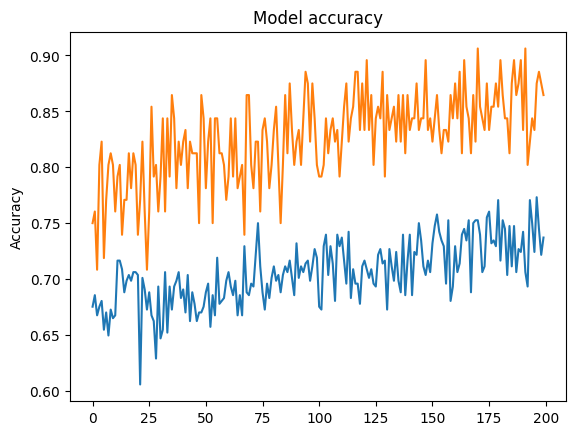

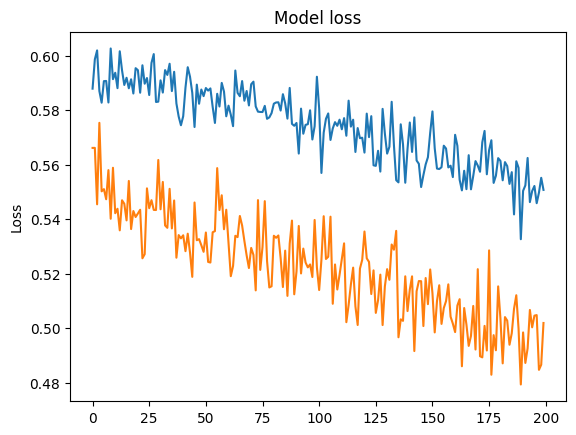

In [26]:
plt.plot(fine_tune_history_ext1.history['accuracy'])
plt.plot(fine_tune_history_ext1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.show()

# Plot the loss
plt.plot(fine_tune_history_ext2.history['loss'])
plt.plot(fine_tune_history_ext2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.show()


In [27]:
for layer in model.layers:
	 layer.trainable = True

model.compile(optimizer=Adam(learning_rate=0.0000001), loss='categorical_crossentropy', metrics=['accuracy'])

fine_tune_history_ext3 = model.fit(train_generator, epochs=EPOCHS, validation_data=val_generator, verbose=1)

Epoch 1/200
13/13 [==============================] - 16s 513ms/step - loss: 0.5429 - accuracy: 0.8119 - val_loss: 0.5067 - val_accuracy: 0.8542
Epoch 2/200
13/13 [==============================] - 5s 333ms/step - loss: 0.5524 - accuracy: 0.7835 - val_loss: 0.4959 - val_accuracy: 0.8750
Epoch 3/200
13/13 [==============================] - 5s 345ms/step - loss: 0.5464 - accuracy: 0.7809 - val_loss: 0.5020 - val_accuracy: 0.8854
Epoch 4/200
13/13 [==============================] - 5s 347ms/step - loss: 0.5565 - accuracy: 0.7964 - val_loss: 0.4993 - val_accuracy: 0.8854
Epoch 5/200
13/13 [==============================] - 4s 339ms/step - loss: 0.5665 - accuracy: 0.7603 - val_loss: 0.4941 - val_accuracy: 0.8750
Epoch 6/200
13/13 [==============================] - 5s 341ms/step - loss: 0.5310 - accuracy: 0.8041 - val_loss: 0.5001 - val_accuracy: 0.8750
Epoch 7/200
13/13 [==============================] - 5s 341ms/step - loss: 0.5463 - accuracy: 0.7912 - val_loss: 0.4857 - val_accuracy: 0.885

In [28]:
for layer in model.layers:
	 layer.trainable = True

model.compile(optimizer=Adam(learning_rate=0.0000001), loss='categorical_crossentropy', metrics=['accuracy'])

fine_tune_history_ext4 = model.fit(train_generator, epochs=EPOCHS, validation_data=val_generator, verbose=1)

Epoch 1/200
13/13 [==============================] - 16s 465ms/step - loss: 0.5241 - accuracy: 0.7680 - val_loss: 0.4497 - val_accuracy: 0.9062
Epoch 2/200
13/13 [==============================] - 4s 324ms/step - loss: 0.5081 - accuracy: 0.8093 - val_loss: 0.4415 - val_accuracy: 0.8854
Epoch 3/200
13/13 [==============================] - 4s 335ms/step - loss: 0.5149 - accuracy: 0.7861 - val_loss: 0.4409 - val_accuracy: 0.8958
Epoch 4/200
13/13 [==============================] - 4s 333ms/step - loss: 0.5129 - accuracy: 0.8093 - val_loss: 0.4654 - val_accuracy: 0.8333
Epoch 5/200
13/13 [==============================] - 4s 333ms/step - loss: 0.5181 - accuracy: 0.7861 - val_loss: 0.4294 - val_accuracy: 0.8854
Epoch 6/200
13/13 [==============================] - 4s 332ms/step - loss: 0.5009 - accuracy: 0.8144 - val_loss: 0.4423 - val_accuracy: 0.8750
Epoch 7/200
13/13 [==============================] - 4s 333ms/step - loss: 0.5007 - accuracy: 0.8247 - val_loss: 0.4529 - val_accuracy: 0.895

In [29]:
for layer in model.layers:
	 layer.trainable = True

model.compile(optimizer=Adam(learning_rate=0.0000001), loss='categorical_crossentropy', metrics=['accuracy'])

fine_tune_history_ext5 = model.fit(train_generator, epochs=EPOCHS, validation_data=val_generator, verbose=1)

Epoch 1/200
13/13 [==============================] - 15s 466ms/step - loss: 0.4586 - accuracy: 0.8351 - val_loss: 0.3920 - val_accuracy: 0.9271
Epoch 2/200
13/13 [==============================] - 4s 347ms/step - loss: 0.4698 - accuracy: 0.8170 - val_loss: 0.4098 - val_accuracy: 0.8646
Epoch 3/200
13/13 [==============================] - 4s 337ms/step - loss: 0.4826 - accuracy: 0.7912 - val_loss: 0.4016 - val_accuracy: 0.8854
Epoch 4/200
13/13 [==============================] - 4s 330ms/step - loss: 0.4600 - accuracy: 0.8247 - val_loss: 0.4098 - val_accuracy: 0.8750
Epoch 5/200
13/13 [==============================] - 4s 333ms/step - loss: 0.4873 - accuracy: 0.7938 - val_loss: 0.3997 - val_accuracy: 0.8854
Epoch 6/200
13/13 [==============================] - 4s 331ms/step - loss: 0.4710 - accuracy: 0.8428 - val_loss: 0.4184 - val_accuracy: 0.8438
Epoch 7/200
13/13 [==============================] - 4s 331ms/step - loss: 0.4584 - accuracy: 0.8196 - val_loss: 0.4022 - val_accuracy: 0.854

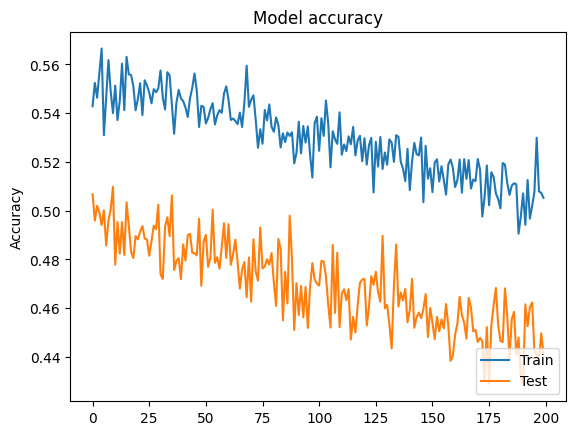

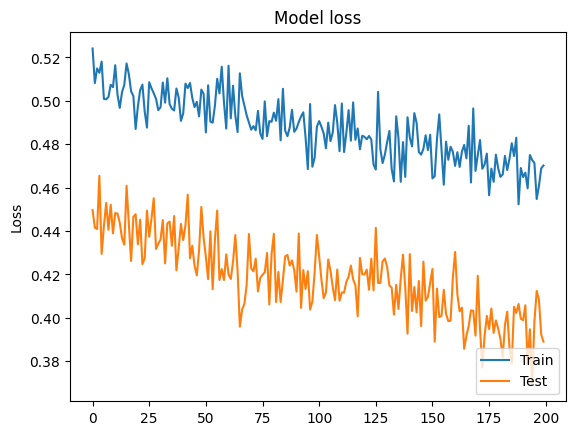

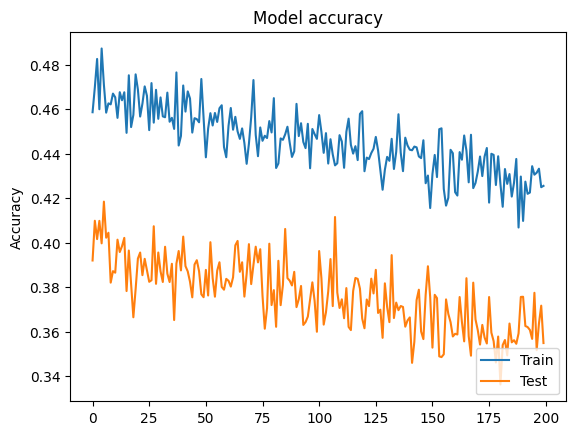

In [34]:
plt.plot(fine_tune_history_ext3.history['loss'])
plt.plot(fine_tune_history_ext3.history['val_loss'])
plt.title('Model accuracy')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

# Plot the loss
plt.plot(fine_tune_history_ext4.history['loss'])
plt.plot(fine_tune_history_ext4.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

plt.plot(fine_tune_history_ext5.history['loss'])
plt.plot(fine_tune_history_ext5.history['val_loss'])
plt.title('Model accuracy')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()



In [35]:
model.compile(optimizer=Adam(learning_rate=0.0000001), loss='categorical_crossentropy', metrics=['accuracy'])

fine_tune_history_ext6 = model.fit(train_generator, epochs=EPOCHS, validation_data=val_generator, verbose=1)

Epoch 1/200
13/13 [==============================] - 90s 6s/step - loss: 0.4329 - accuracy: 0.8402 - val_loss: 0.3733 - val_accuracy: 0.8958
Epoch 2/200
13/13 [==============================] - 13s 972ms/step - loss: 0.4031 - accuracy: 0.8814 - val_loss: 0.3733 - val_accuracy: 0.8854
Epoch 3/200
13/13 [==============================] - 8s 582ms/step - loss: 0.4227 - accuracy: 0.8531 - val_loss: 0.3500 - val_accuracy: 0.9167
Epoch 4/200
13/13 [==============================] - 7s 564ms/step - loss: 0.4413 - accuracy: 0.8170 - val_loss: 0.3777 - val_accuracy: 0.8958
Epoch 5/200
13/13 [==============================] - 6s 493ms/step - loss: 0.4351 - accuracy: 0.8428 - val_loss: 0.3582 - val_accuracy: 0.8646
Epoch 6/200
13/13 [==============================] - 7s 538ms/step - loss: 0.4198 - accuracy: 0.8454 - val_loss: 0.3549 - val_accuracy: 0.9375
Epoch 7/200
13/13 [==============================] - 8s 600ms/step - loss: 0.4284 - accuracy: 0.8479 - val_loss: 0.3723 - val_accuracy: 0.8958


In [36]:
model.compile(optimizer=Adam(learning_rate=0.0000001), loss='categorical_crossentropy', metrics=['accuracy'])

fine_tune_history_ext7 = model.fit(train_generator, epochs=EPOCHS, validation_data=val_generator, verbose=1)

Epoch 1/200
13/13 [==============================] - 15s 471ms/step - loss: 0.4008 - accuracy: 0.8376 - val_loss: 0.3135 - val_accuracy: 0.8646
Epoch 2/200
13/13 [==============================] - 5s 337ms/step - loss: 0.4003 - accuracy: 0.8582 - val_loss: 0.3178 - val_accuracy: 0.9062
Epoch 3/200
13/13 [==============================] - 5s 347ms/step - loss: 0.3866 - accuracy: 0.8686 - val_loss: 0.3071 - val_accuracy: 0.9271
Epoch 4/200
13/13 [==============================] - 5s 340ms/step - loss: 0.3868 - accuracy: 0.8634 - val_loss: 0.3146 - val_accuracy: 0.9062
Epoch 5/200
13/13 [==============================] - 4s 335ms/step - loss: 0.4051 - accuracy: 0.8325 - val_loss: 0.3358 - val_accuracy: 0.8854
Epoch 6/200
13/13 [==============================] - 4s 337ms/step - loss: 0.3902 - accuracy: 0.8479 - val_loss: 0.3182 - val_accuracy: 0.8958
Epoch 7/200
13/13 [==============================] - 4s 334ms/step - loss: 0.3784 - accuracy: 0.8763 - val_loss: 0.3390 - val_accuracy: 0.906

In [37]:
model.compile(optimizer=Adam(learning_rate=0.0000001), loss='categorical_crossentropy', metrics=['accuracy'])

fine_tune_history_ext8 = model.fit(train_generator, epochs=EPOCHS, validation_data=val_generator, verbose=1)

Epoch 1/200
13/13 [==============================] - 15s 483ms/step - loss: 0.3482 - accuracy: 0.8892 - val_loss: 0.3001 - val_accuracy: 0.8854
Epoch 2/200
13/13 [==============================] - 4s 324ms/step - loss: 0.3655 - accuracy: 0.8686 - val_loss: 0.3267 - val_accuracy: 0.8854
Epoch 3/200
13/13 [==============================] - 4s 333ms/step - loss: 0.3779 - accuracy: 0.8479 - val_loss: 0.3189 - val_accuracy: 0.8646
Epoch 4/200
13/13 [==============================] - 4s 335ms/step - loss: 0.3673 - accuracy: 0.8557 - val_loss: 0.2855 - val_accuracy: 0.9479
Epoch 5/200
13/13 [==============================] - 4s 355ms/step - loss: 0.3481 - accuracy: 0.9149 - val_loss: 0.3035 - val_accuracy: 0.8958
Epoch 6/200
13/13 [==============================] - 4s 335ms/step - loss: 0.3670 - accuracy: 0.8608 - val_loss: 0.2881 - val_accuracy: 0.9271
Epoch 7/200
13/13 [==============================] - 4s 335ms/step - loss: 0.3472 - accuracy: 0.8918 - val_loss: 0.3051 - val_accuracy: 0.895

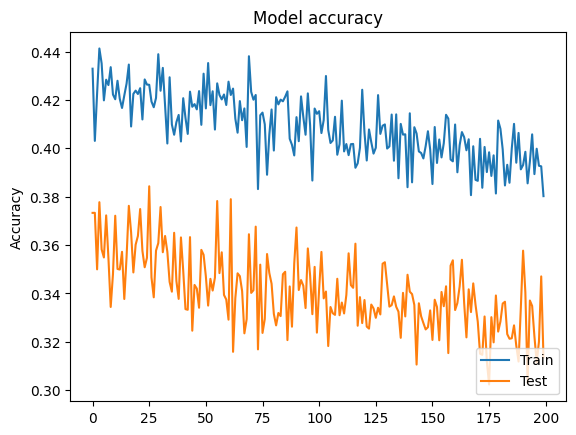

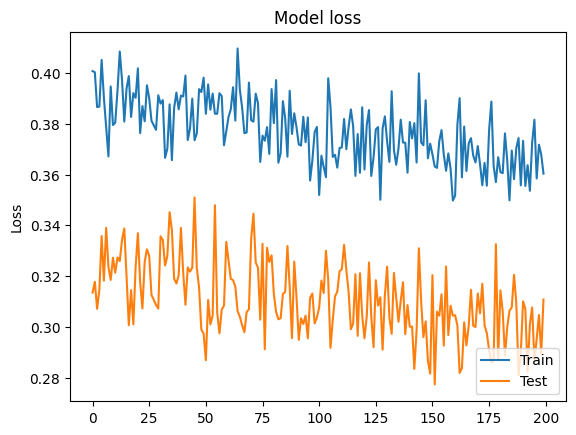

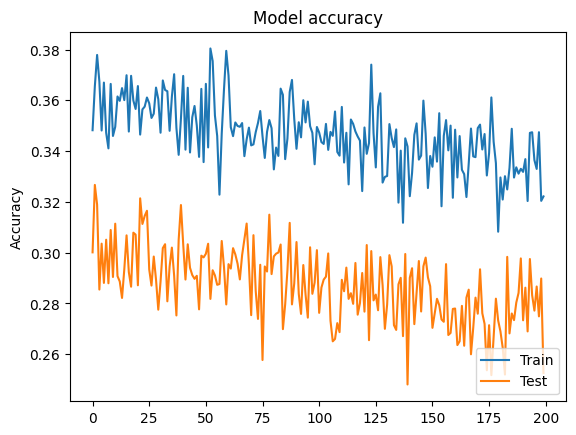

In [38]:
plt.plot(fine_tune_history_ext6.history['loss'])
plt.plot(fine_tune_history_ext6.history['val_loss'])
plt.title('Model accuracy')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

# Plot the loss
plt.plot(fine_tune_history_ext7.history['loss'])
plt.plot(fine_tune_history_ext7.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

plt.plot(fine_tune_history_ext8.history['loss'])
plt.plot(fine_tune_history_ext8.history['val_loss'])
plt.title('Model accuracy')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()



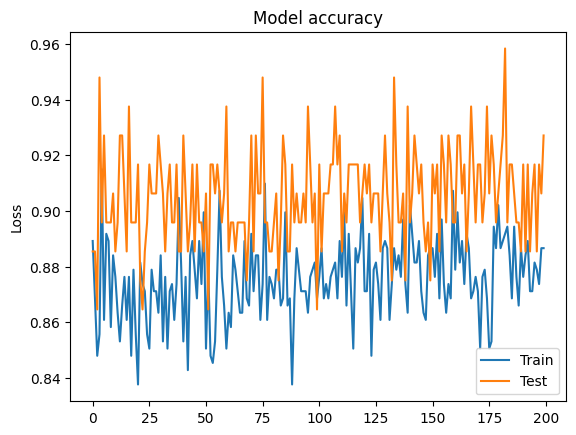

In [39]:
plt.plot(fine_tune_history_ext8.history['accuracy'])
plt.plot(fine_tune_history_ext8.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()



In [40]:

fine_tune_history_ext9 = model.fit(train_generator, epochs=EPOCHS, validation_data=val_generator, verbose=1)


Epoch 1/200
13/13 [==============================] - 32s 3s/step - loss: 0.3360 - accuracy: 0.8789 - val_loss: 0.2976 - val_accuracy: 0.8646
Epoch 2/200
13/13 [==============================] - 37s 3s/step - loss: 0.3196 - accuracy: 0.8892 - val_loss: 0.2605 - val_accuracy: 0.9375
Epoch 3/200
13/13 [==============================] - 31s 3s/step - loss: 0.3401 - accuracy: 0.8711 - val_loss: 0.2784 - val_accuracy: 0.9271
Epoch 4/200
13/13 [==============================] - 42s 3s/step - loss: 0.3463 - accuracy: 0.8995 - val_loss: 0.2681 - val_accuracy: 0.9062
Epoch 5/200
13/13 [==============================] - 32s 2s/step - loss: 0.3367 - accuracy: 0.8814 - val_loss: 0.2720 - val_accuracy: 0.9271
Epoch 6/200
13/13 [==============================] - 21s 2s/step - loss: 0.3376 - accuracy: 0.8608 - val_loss: 0.2976 - val_accuracy: 0.8958
Epoch 7/200
13/13 [==============================] - 25s 2s/step - loss: 0.3231 - accuracy: 0.8943 - val_loss: 0.2691 - val_accuracy: 0.9062
Epoch 8/200
1

In [41]:

fine_tune_history_ext10 = model.fit(train_generator, epochs=EPOCHS, validation_data=val_generator, verbose=1)


Epoch 1/200
13/13 [==============================] - 5s 354ms/step - loss: 0.3247 - accuracy: 0.8840 - val_loss: 0.2578 - val_accuracy: 0.9062
Epoch 2/200
13/13 [==============================] - 5s 341ms/step - loss: 0.2914 - accuracy: 0.9149 - val_loss: 0.2545 - val_accuracy: 0.8750
Epoch 3/200
13/13 [==============================] - 4s 335ms/step - loss: 0.3263 - accuracy: 0.8711 - val_loss: 0.2416 - val_accuracy: 0.9062
Epoch 4/200
13/13 [==============================] - 4s 357ms/step - loss: 0.2968 - accuracy: 0.8866 - val_loss: 0.2568 - val_accuracy: 0.8958
Epoch 5/200
13/13 [==============================] - 4s 339ms/step - loss: 0.3003 - accuracy: 0.8892 - val_loss: 0.2588 - val_accuracy: 0.9167
Epoch 6/200
13/13 [==============================] - 4s 338ms/step - loss: 0.2962 - accuracy: 0.8892 - val_loss: 0.2580 - val_accuracy: 0.9167
Epoch 7/200
13/13 [==============================] - 4s 337ms/step - loss: 0.3130 - accuracy: 0.8840 - val_loss: 0.2454 - val_accuracy: 0.9271

In [42]:

fine_tune_history_ext11 = model.fit(train_generator, epochs=EPOCHS, validation_data=val_generator, verbose=1)


Epoch 1/200
13/13 [==============================] - 5s 353ms/step - loss: 0.2725 - accuracy: 0.9021 - val_loss: 0.2472 - val_accuracy: 0.8854
Epoch 2/200
13/13 [==============================] - 5s 338ms/step - loss: 0.2915 - accuracy: 0.8892 - val_loss: 0.2193 - val_accuracy: 0.9271
Epoch 3/200
13/13 [==============================] - 5s 343ms/step - loss: 0.2892 - accuracy: 0.9072 - val_loss: 0.2520 - val_accuracy: 0.8854
Epoch 4/200
13/13 [==============================] - 4s 331ms/step - loss: 0.2914 - accuracy: 0.8814 - val_loss: 0.2706 - val_accuracy: 0.8854
Epoch 5/200
13/13 [==============================] - 4s 338ms/step - loss: 0.2993 - accuracy: 0.8763 - val_loss: 0.2392 - val_accuracy: 0.9271
Epoch 6/200
13/13 [==============================] - 4s 339ms/step - loss: 0.3000 - accuracy: 0.8789 - val_loss: 0.2313 - val_accuracy: 0.9062
Epoch 7/200
13/13 [==============================] - 4s 334ms/step - loss: 0.2888 - accuracy: 0.9072 - val_loss: 0.2347 - val_accuracy: 0.9375

In [43]:

fine_tune_history_ext12 = model.fit(train_generator, epochs=EPOCHS, validation_data=val_generator, verbose=1)


Epoch 1/200
13/13 [==============================] - 5s 360ms/step - loss: 0.2665 - accuracy: 0.9072 - val_loss: 0.2373 - val_accuracy: 0.8958
Epoch 2/200
13/13 [==============================] - 5s 337ms/step - loss: 0.2922 - accuracy: 0.8814 - val_loss: 0.2281 - val_accuracy: 0.9271
Epoch 3/200
13/13 [==============================] - 4s 338ms/step - loss: 0.2600 - accuracy: 0.9098 - val_loss: 0.2458 - val_accuracy: 0.9062
Epoch 4/200
13/13 [==============================] - 4s 336ms/step - loss: 0.2668 - accuracy: 0.9098 - val_loss: 0.2195 - val_accuracy: 0.9167
Epoch 5/200
13/13 [==============================] - 4s 336ms/step - loss: 0.2792 - accuracy: 0.8995 - val_loss: 0.2019 - val_accuracy: 0.9062
Epoch 6/200
13/13 [==============================] - 4s 335ms/step - loss: 0.2604 - accuracy: 0.9072 - val_loss: 0.2113 - val_accuracy: 0.9479
Epoch 7/200
13/13 [==============================] - 4s 329ms/step - loss: 0.2775 - accuracy: 0.8969 - val_loss: 0.2300 - val_accuracy: 0.9271

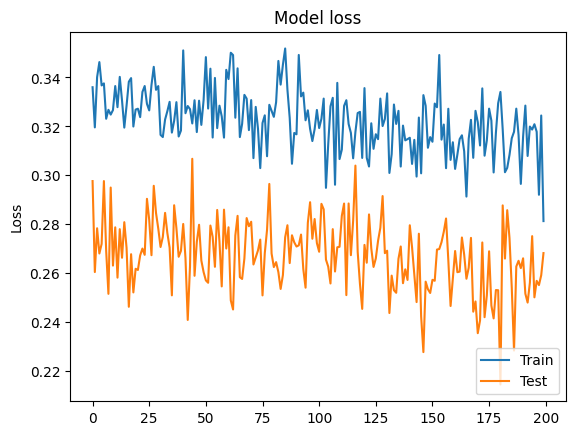

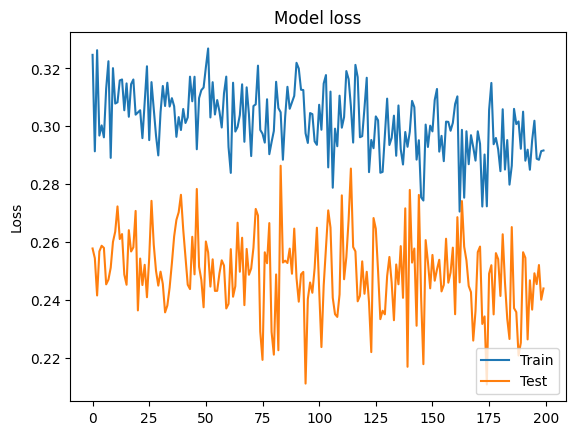

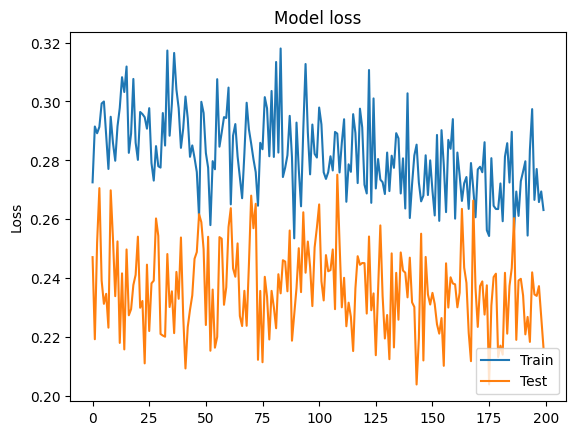

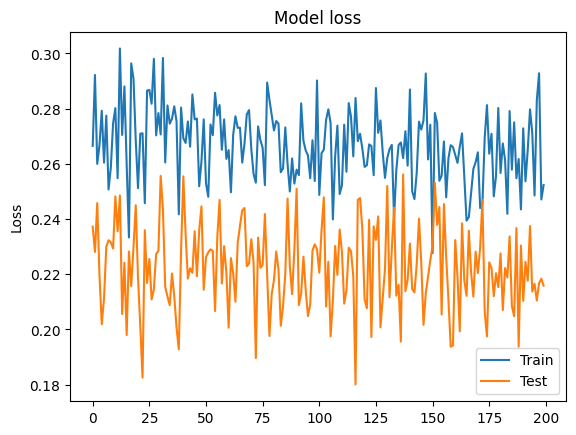

In [45]:
# Plot the loss
plt.plot(fine_tune_history_ext9.history['loss'])
plt.plot(fine_tune_history_ext9.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

plt.plot(fine_tune_history_ext10.history['loss'])
plt.plot(fine_tune_history_ext10.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

plt.plot(fine_tune_history_ext11.history['loss'])
plt.plot(fine_tune_history_ext11.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

plt.plot(fine_tune_history_ext12.history['loss'])
plt.plot(fine_tune_history_ext12.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='lower right')

In [46]:

model.save('./EfficientNetModel/model.h5')

In [44]:
fine_tune_history_ext13 = model.fit(train_generator, epochs=EPOCHS, validation_data=val_generator, verbose=1)


Epoch 1/200
13/13 [==============================] - 5s 361ms/step - loss: 0.2641 - accuracy: 0.8918 - val_loss: 0.2158 - val_accuracy: 0.9271
Epoch 2/200
13/13 [==============================] - 4s 334ms/step - loss: 0.2703 - accuracy: 0.8866 - val_loss: 0.2111 - val_accuracy: 0.8958
Epoch 3/200
13/13 [==============================] - 4s 336ms/step - loss: 0.2714 - accuracy: 0.9046 - val_loss: 0.2073 - val_accuracy: 0.9167
Epoch 4/200
13/13 [==============================] - 4s 333ms/step - loss: 0.2586 - accuracy: 0.9072 - val_loss: 0.2157 - val_accuracy: 0.9167
Epoch 5/200
13/13 [==============================] - 4s 336ms/step - loss: 0.2697 - accuracy: 0.8995 - val_loss: 0.2100 - val_accuracy: 0.9167
Epoch 6/200
13/13 [==============================] - 4s 339ms/step - loss: 0.2633 - accuracy: 0.8969 - val_loss: 0.2050 - val_accuracy: 0.9271
Epoch 7/200
13/13 [==============================] - 4s 336ms/step - loss: 0.2353 - accuracy: 0.9253 - val_loss: 0.2385 - val_accuracy: 0.8958

KeyboardInterrupt: 

In [5]:
m = load_model('./EfficientNetModel/model.h5')

In [6]:
val_loss, val_acc = m.evaluate(val_generator)

# Print the validation accuracy
print('Validation accuracy:', val_acc)

C:\Users\mlg\AppData\Local\Temp\ipykernel_26916\547914296.py:7: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = m.predict_generator(val_generator, val_generator.samples // val_generator.batch_size+1)


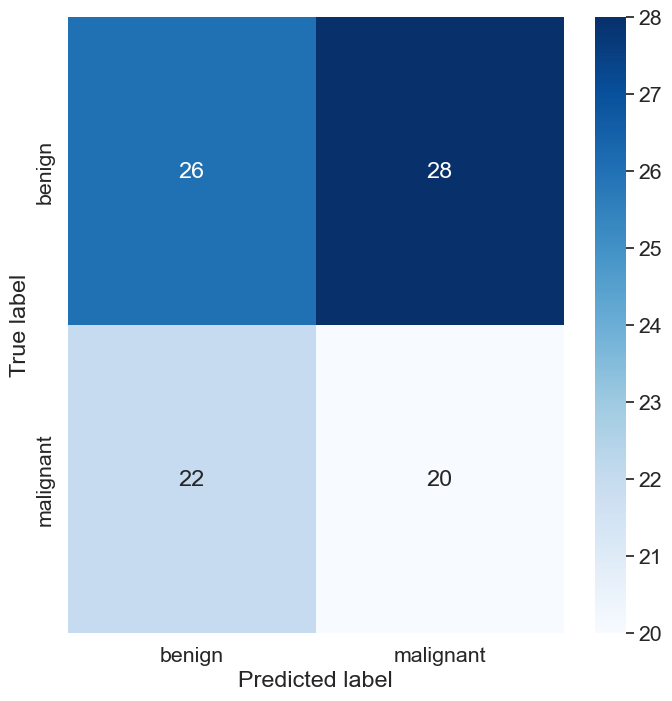

In [11]:
# Import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Y_pred = m.predict_generator(val_generator, val_generator.samples // val_generator.batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

# get the true labels of the validation data
y_true = val_generator.classes

# create a confusion matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 8))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['benign', 'malignant'], yticklabels=['benign', 'malignant'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()